In [7]:
import pandas as pd
import numpy as np
import pathlib
import pprint
import cv2
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

### Sal.co utility notebook

This notebook enables user to evaluate which methods performs best for every class.

Results path has to be provided.

In [18]:
results = pathlib.Path('/home/jakubkorczakowski/Studia/inż/Semestr6/pracka-inz/thesis_res/cosal_sal_testing/notebooks/metrics/result_all_7_methods.csv')

In [19]:
df = pd.read_csv(results)
print(f"Data headers: {[row for row in df.columns]}")

Data headers: ['data_class', 'method', 'mae', 'max-fm', 'mean-fm', 'max-Emeasure', 'mean-Emeasure', 'S-measure', 'AP', 'AUC']


In [20]:
methods_to_skip = ['U2Net', 'LDF']

for method in methods_to_skip:
    df = df[df.method != method]

In [9]:
df.head()

,data_class,method,mae,max-fm,mean-fm,max-Emeasure,mean-Emeasure,S-measure,AP,AUC
0,CoCA_beer_bottle,CoU2Net,0.0639,0.6197,0.6091,0.8124,0.8007,0.7581,0.5623,0.8859
1,CoCA_beer_bottle,CoLDF,0.0561,0.6499,0.6422,0.8297,0.8168,0.7820,0.5994,0.8856
2,CoCA_beer_bottle,COEGNET,0.1174,0.5072,0.4822,0.7089,0.6964,0.6305,0.4033,0.7684
3,CoCA_beer_bottle,GICD,0.0894,0.5814,0.5759,0.7996,0.7874,0.7006,0.4852,0.8361
4,CoCA_beer_bottle,GCoNet,0.0946,0.5122,0.5017,0.8219,0.7909,0.6725,0.3970,0.8001


In [16]:
best_dict = {
    method: list() for method in df.method.unique()
}

for dc in df.data_class.unique():
    temp_df = df.loc[df.data_class == dc]
    temp_best_dict = {
        method: 0 for method in df.method.unique()
    }
    min_keys = ['mae']
#     min_keys = ['max-fm', 'mean-fm', 'max-Emeasure', 'mean-Emeasure', 'S-measure', 'AP', 'AUC']
    for key in min_keys:
        best = temp_df[temp_df[key] == temp_df.loc[:, key].min()]['method'].values[0]
        temp_best_dict[best] = temp_best_dict[best] + 1
#     max_keys = ['mae']
    max_keys = ['max-fm', 'mean-fm', 'max-Emeasure', 'mean-Emeasure', 'S-measure', 'AP', 'AUC']
    for key in max_keys:
        best = temp_df[temp_df[key] == temp_df.loc[:, key].max()]['method'].values[0]
        temp_best_dict[best] = temp_best_dict[best] + 1
    my_max = max(temp_best_dict, key=temp_best_dict.get)
    name = dc.replace('CoCA_', '')
    best_dict[my_max].append(name)

        
pp.pprint(best_dict)

{   'COEGNET': [   'chopsticks',
                   'sticky_note',
                   'tablet',
                   'frisbee',
                   'watermelon',
                   'handbag',
                   'gift_box',
                   'teddy_bear',
                   'dice',
                   'doughnut',
                   'Yellow_duck',
                   'rolling_pin',
                   'glove'],
    'CoLDF': [   'beer_bottle',
                 'glasses',
                 'pigeon',
                 'hammock',
                 'UAV',
                 'Accordion',
                 'faucet',
                 'hourglass',
                 'stool',
                 'macaroon',
                 'wheelchair',
                 'stethoscope',
                 'pineapple',
                 'headphone',
                 'fishing_rod',
                 'belt',
                 'harp',
                 'watering_can',
                 'calculator',
                 'whisk',
                

In [17]:
best_num_dict = {
    method: len(best_dict[method]) for method in best_dict.keys()
}

pp.pprint(best_num_dict)

{'COEGNET': 13, 'CoLDF': 21, 'CoU2Net': 6, 'GCoNet': 26, 'GICD': 14}


### Image explorer

In [48]:
dataset = 'CoCA'
image_dir = pathlib.Path(f"/home/jakubkorczakowski/Studia/inż/Semestr6/pracka-inz/thesis_res/{dataset}/image")
gt_dir = pathlib.Path(f"/home/jakubkorczakowski/Studia/inż/Semestr6/pracka-inz/thesis_res/SalMaps/gt/{dataset}")

pred_dir = pathlib.Path('/home/jakubkorczakowski/Studia/inż/Semestr6/pracka-inz/thesis_res/SalMaps/pred')

In [49]:
category_name = 'sunflower'

for file in (image_dir / category_name).rglob("*.jpg"):
    print(file.name)

4307839.jpg
4442203.jpg
2742860.jpg
1869583.jpg
3628624.jpg
2699771.jpg
1599685.jpg
851297.jpg
1719119.jpg
3811492.jpg
2350472.jpg


In [38]:
plt.rcParams['figure.figsize'] = [15, 5]

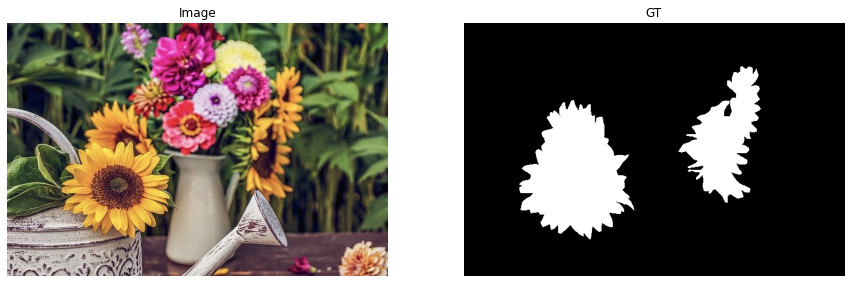

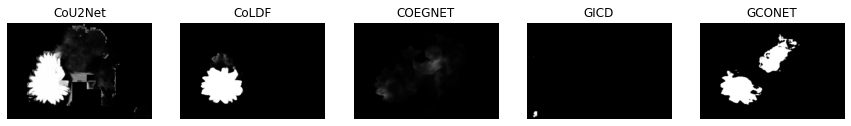

In [51]:
image_name = '4442203'

fig, axs = plt.subplots(1, 2)

image = cv2.imread(str(image_dir / category_name / f"{image_name}.jpg"))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
axs[0].imshow(image)
axs[0].set_title('Image')
axs[0].axis('off')

gt = cv2.imread(str(gt_dir / category_name / f"{image_name}.png"))
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
axs[1].imshow(gt)
axs[1].set_title('GT')
axs[1].axis('off')

fig, axs = plt.subplots(1, 5)

for i, method in enumerate(df.method.unique()):
    if method == "GCoNet": method = "GCONET"
    pred = cv2.imread(str(pred_dir / method / "CoCA" / category_name / f"{image_name}.png"))
    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)
    axs[i].imshow(pred)
    axs[i].set_title(method)
    axs[i].axis('off')
